In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import quandl

In [2]:
quandl.ApiConfig.api_key = '59jzyL6L1Q5X8VqkGpTx'

In [3]:
# Get data from quandl

aapl_table = quandl.get('WIKI/AAPL')
amzn_table = quandl.get('WIKI/AMZN')

In [4]:
# Fetch data from Jan 2017 to Jun 2017

aapl = aapl_table.loc['2017':'2017-6',['Close']]
amzn = amzn_table.loc['2017':'2017-6',['Close']]

In [5]:
# Calculate log return

aapl_log = np.log(aapl['Close']).diff().dropna()
amzn_log = np.log(amzn['Close']).diff().dropna()

df = pd.concat([aapl_log, amzn_log], axis=1).dropna()
df.columns = ['aapl', 'amzn']

print(df.tail())

                aapl      amzn
Date                          
2017-06-26 -0.003628 -0.009771
2017-06-27 -0.014367 -0.017456
2017-06-28  0.014435  0.013777
2017-06-29 -0.014853 -0.014647
2017-06-30  0.002364 -0.008159


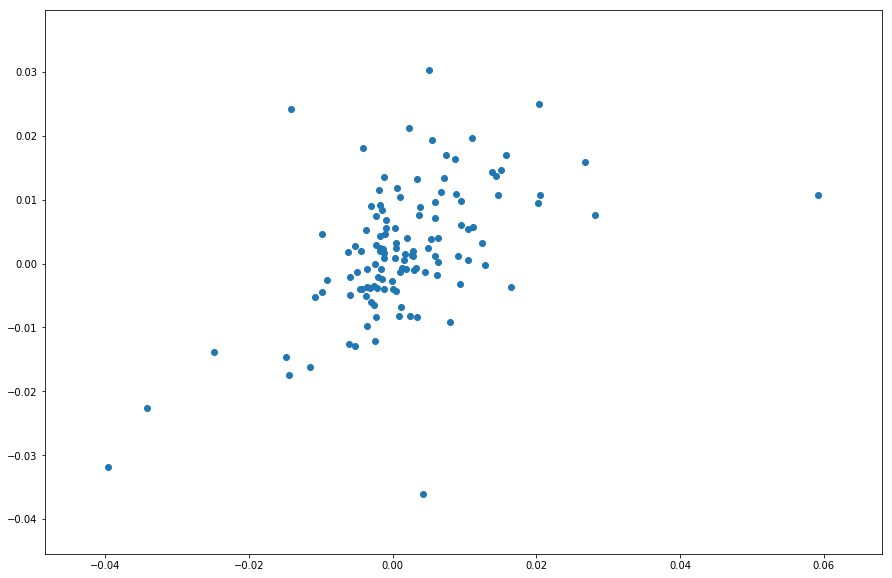

In [6]:
plt.figure(figsize=(15,10))
plt.scatter(df.aapl, df.amzn)
plt.show()

In [7]:
# Slope and Intercept

model = sm.ols(formula='aapl-amzn', data=df).fit()
print(model.summary())

PatsyError: model is missing required outcome variables

In [ ]:
print('pamameters: ', model.params)

In [ ]:
print('residual: ', model.resid.tail())

In [ ]:
print('fitted values: ', model.predict())

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(df.aapl, df.amzn)
plt.xlabel('aapl_return')
plt.ylabel('amzn_return')
plt.plot(df.aapl, model.predict(),color = 'red')
plt.show()